## Detección de outliers por feature = SIZE y  por revisión

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar matrices de progresores y no progesores

matriz_progresores = np.load('Matriz_progresores.npy') 
matriz_no_progresores = np.load('Matriz_no_progresores.npy') 
print(matriz_progresores.shape)
print(matriz_no_progresores.shape)

(132, 22, 22)
(1515, 33, 22)


In [3]:
revisiones_no_prog = matriz_no_progresores.shape[1]
print (revisiones_no_prog)

matriz_progresores

33


array([[[ 50. ,  78. , 152. , ...,   nan, 129. ,  92. ],
        [ 50. ,  73. , 152. , ...,   nan, 107. ,  70. ],
        [ 51. ,  71. , 152. , ...,   nan, 127. ,  88. ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[ 56. ,  66. , 172. , ...,   nan, 146. ,  94. ],
        [ 57. ,  69. , 168. , ...,   nan, 143. ,  89. ],
        [ 57. ,  68. , 168. , ...,   nan, 152. ,  89. ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[ 66. ,  85. , 162. , ...,   nan, 136. ,  74. ],
        [ 67. ,  87. , 162. , ...,   nan, 125. ,  62. ],
        [ 67. ,  87.5, 162. , ...,   nan, 136. ,  71. ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   n

In [5]:
revisiones_prog = matriz_progresores.shape[1]
print (revisiones_prog)

22


In [17]:
a = np.array([[1,2,3],[4,5,6]])
print(a)
print(a.shape)


idx = np.array([[True,True,True],[True]*3])
idx[-1,-1] = False
idx[0,0]  = False
print(idx)
print(a[idx])



[[1 2 3]
 [4 5 6]]
(2, 3)
[[False  True  True]
 [ True  True False]]
[2 3 4 5]


In [7]:
# Creamos matriz de índices con todo true y mismas dimensiones que matriz progresores

idx_prog = np.zeros(matriz_progresores.shape, dtype=bool)
idx_prog[:,:,:] = True

#En este notebook siempre trabajamos con idx size
idx_feature = 2

# Poner a false las posiciones de la matriz progresores que tengan nan
for rev in range(revisiones_prog):
    
    idxn = np.isnan(matriz_progresores[:,rev,idx_feature]) #vector con True donde hay NAN
    #idxoutl = (matriz_no_progresores[:,1,16] < 200) & (matriz_no_progresores[:,1,16] > 50)
    idx_prog[:,rev,idx_feature] = ~idxn


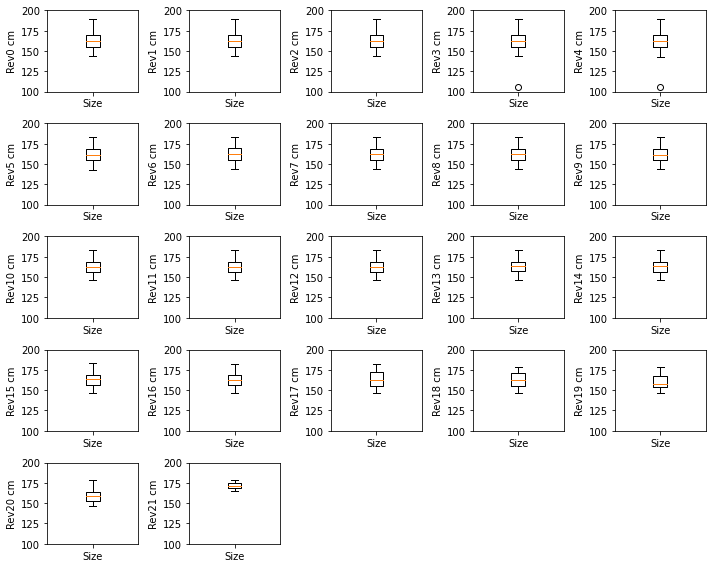

In [44]:
#Pintar boxplot para cada revision
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (10,8))



for i in range(revisiones_prog):
    plt.subplot(5,5,i+1)
    plt.boxplot(matriz_progresores[idx_prog[:,i,idx_feature],i,idx_feature])
    plt.xticks([1],['Size'])
    plt.ylabel('Rev'+str(i)+ ' cm')
    plt.ylim(100,200)

plt.tight_layout()

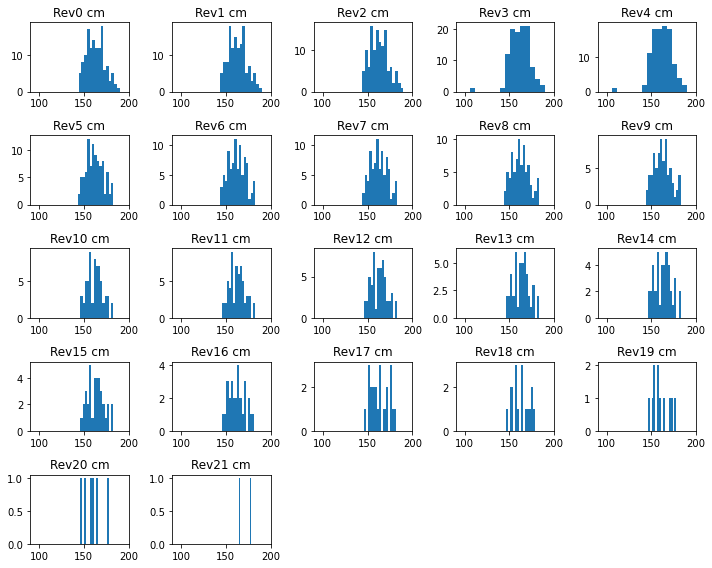

In [48]:
plt.figure(figsize = (10,8))



for i in range(revisiones_prog):
    plt.subplot(5,5,i+1)
    plt.hist(matriz_progresores[idx_prog[:,i,idx_feature],i,idx_feature],bins = 15)
    plt.title('Rev'+str(i)+ ' cm')
    
    plt.xlim(90,200)
plt.tight_layout()

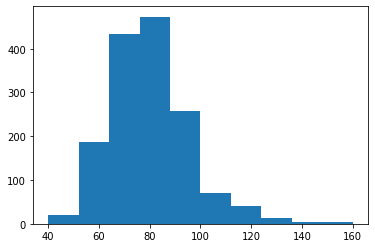

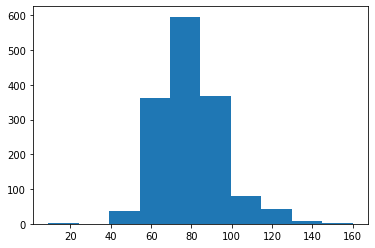

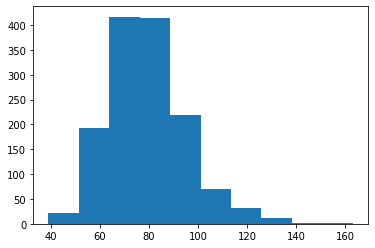

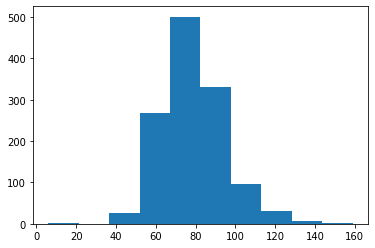

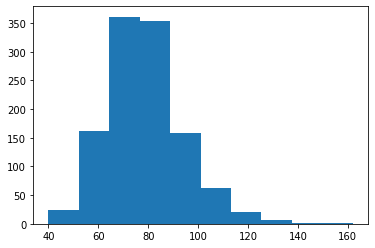

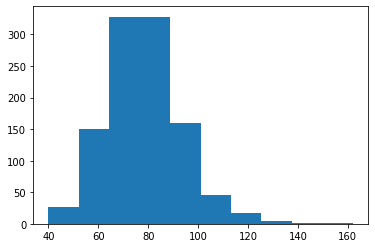

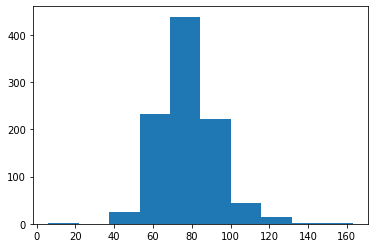

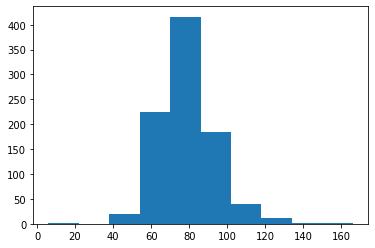

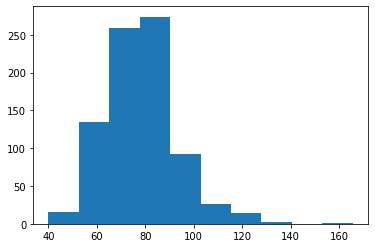

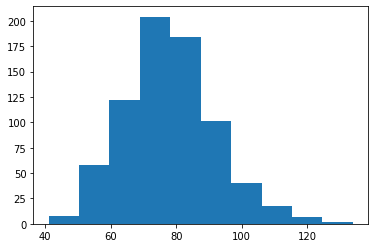

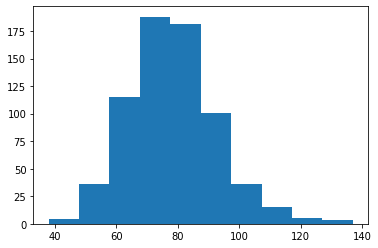

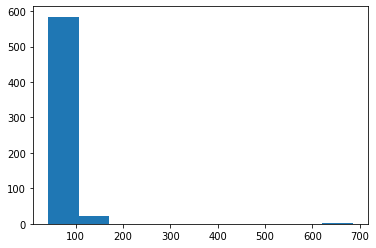

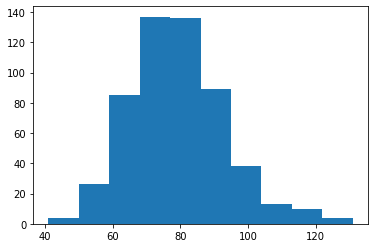

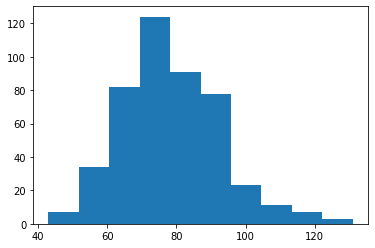

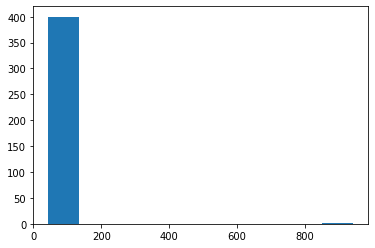

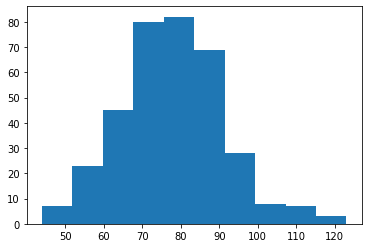

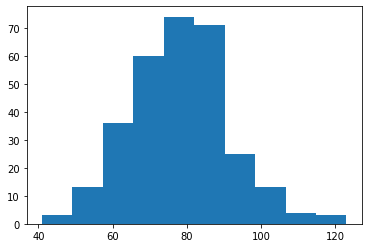

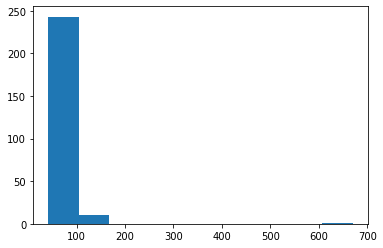

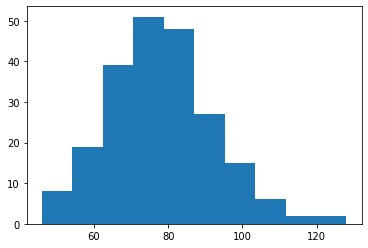

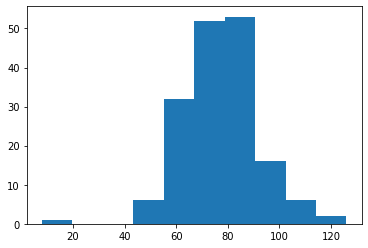

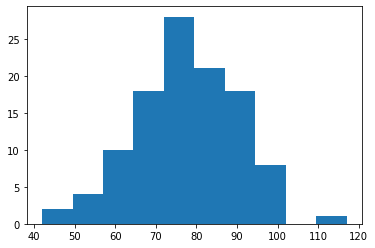

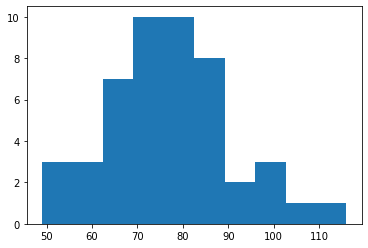

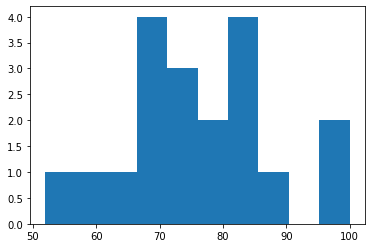

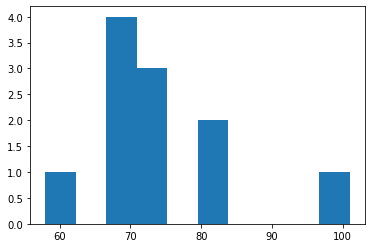

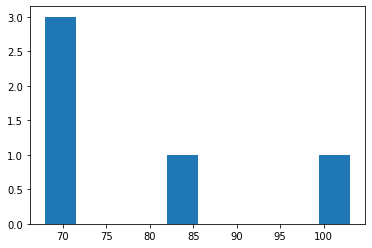

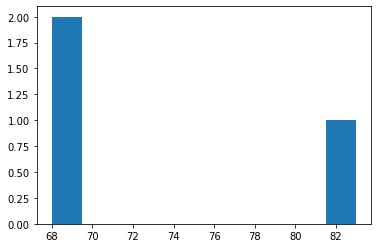

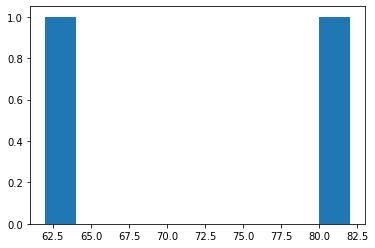

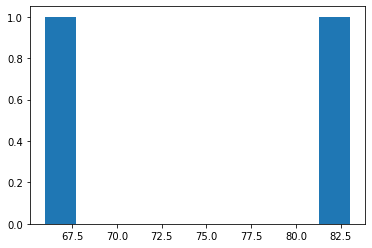

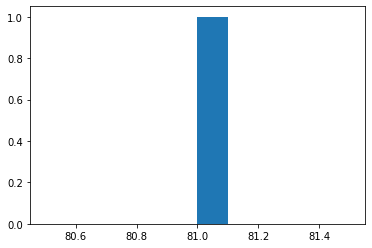

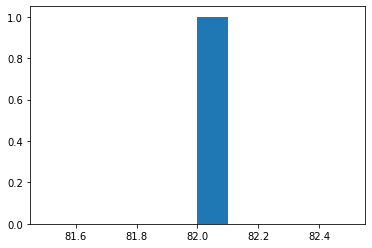

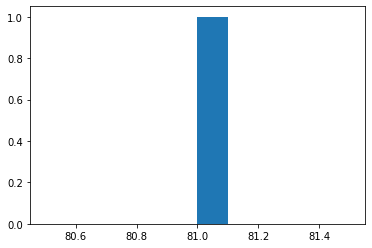

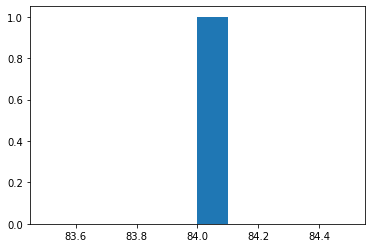

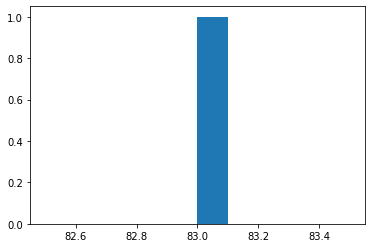

In [47]:
for i in range(revisiones_no_prog):
    plt.hist(matriz_no_progresores[:,i,2])
    plt.show()

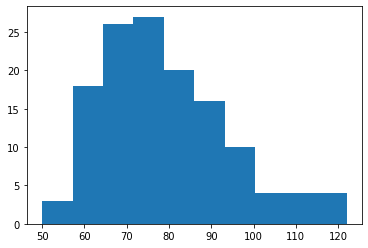

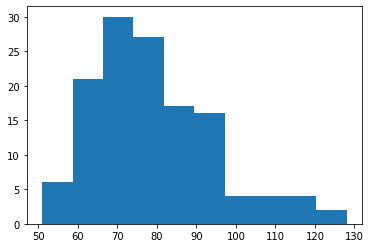

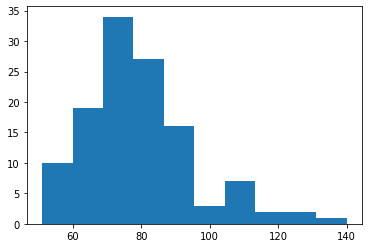

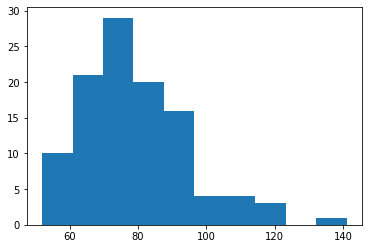

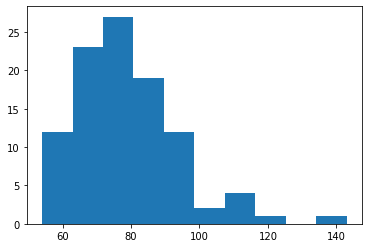

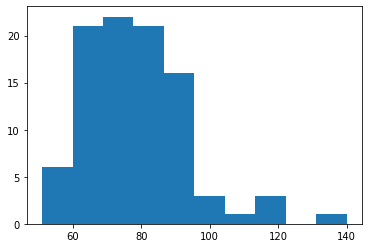

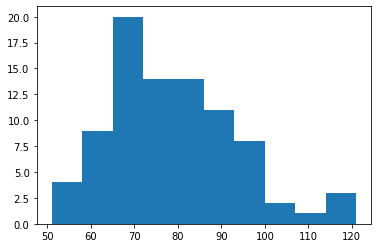

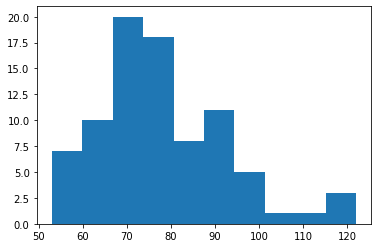

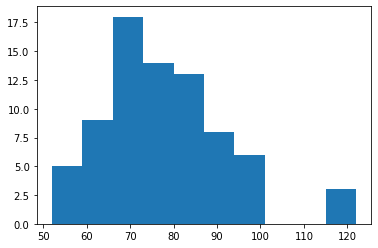

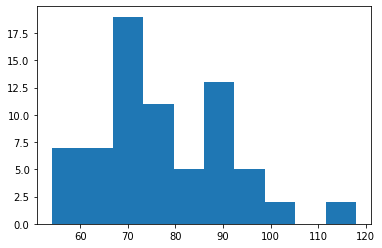

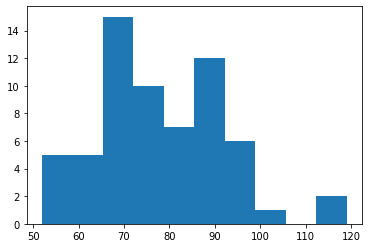

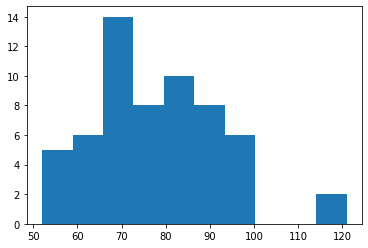

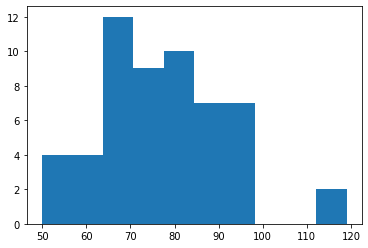

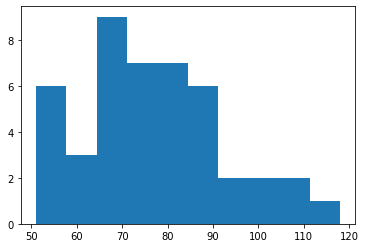

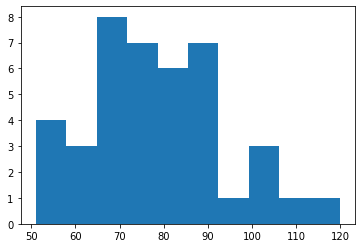

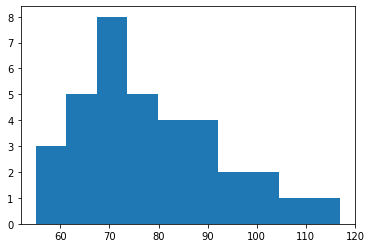

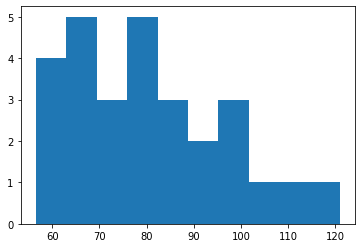

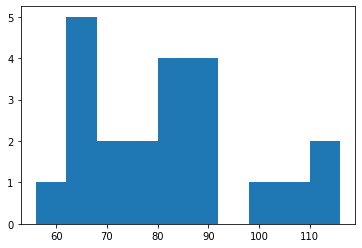

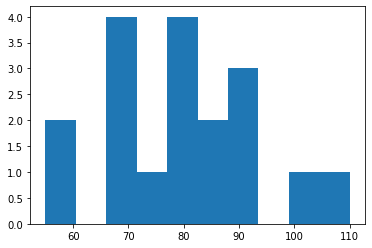

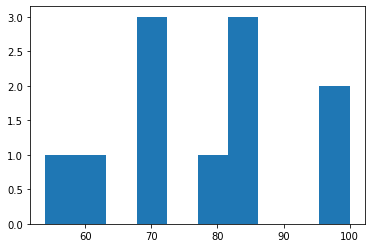

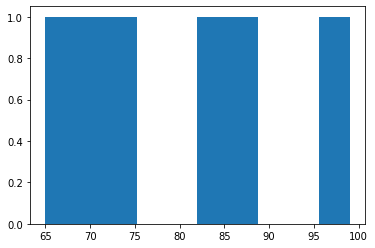

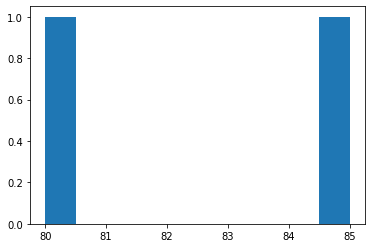

In [9]:
for i in range(revisiones_prog):
    plt.hist(matriz_progresores[:,i,1])
    plt.show()

In [31]:
print(matriz_progresores[:,:,1].shape)

(132, 22)
